In [24]:
import numpy as np
import pandas as pd

import os, sys
import random

try:
    os.chdir('CrowdInference')
    sys.path.append(os.getcwd())
except:
    pass

import crowd_inference.methods.dawid_skene as ds
import crowd_inference.methods.majority_vote as mv
import crowd_inference.methods.raykar as r
import crowd_inference.methods.raykar_boosting as rb
import crowd_inference.methods.raykar_plus_ds as rds
import crowd_inference.methods.classifier as cls
import benchmark as bm

from crowd_inference.truth_inference import NoFeaturesInference, TruthInference, WithFeaturesInference
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression, LogisticRegression
import matplotlib.pyplot as plt
from collections import defaultdict
import tests.data_provider as data
from tqdm.auto import tqdm

import seaborn as sns
sns.set()
sns.set(font_scale=1.2)


from importlib import reload

def reload_all():
    reload(ds)
    reload(r)
    reload(rb)
    reload(rds)
    reload(cls)
    reload(bm)

reload(data)

<module 'tests.data_provider' from '/Users/andrey/Documents/5Course/CrowdInference/tests/data_provider.py'>

In [2]:
music_data = data.MusicDataProvider()

Iter 00, logit: -7.202692
Iter 10, logit: -6.147112
Iter 20, logit: -6.118829
Iter 30, logit: -6.104847
Iter 40, logit: -6.098567
Iter 50, logit: -6.095118
Iter 60, logit: -6.092918
Iter 70, logit: -6.091418
Iter 80, logit: -6.090356
Iter 90, logit: -6.089583
Iter 100, logit: -6.089009
Iter 110, logit: -6.088572
Iter 120, logit: -6.088232
Iter 130, logit: -6.087964
Iter 140, logit: -6.087748
Iter 150, logit: -6.087572
Iter 160, logit: -6.087427
Iter 170, logit: -6.087305
Iter 180, logit: -6.087203
Iter 190, logit: -6.087115
[0.09993472 0.10313253 0.11092602 0.0991359  0.0947824  0.11122991
 0.06140385 0.12126823 0.09149714 0.1066893 ]
---------------
Label accuracy is 0.7757142857142857
--------------------------------------------------
Data has 125 features
Iter 00, logit: -7.221320
Iter 10, logit: -5.956257
Iter 20, logit: -5.738515
Iter 30, logit: -5.563593
Iter 40, logit: -5.417342
Iter 50, logit: -5.289172
Iter 60, logit: -5.181250
Iter 70, logit: -5.088405
Iter 80, logit: -5.0084

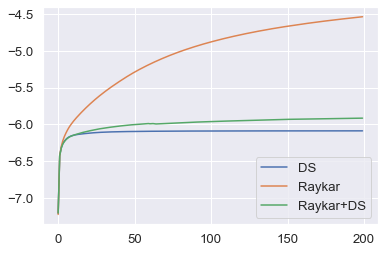

In [48]:
reload_all()
music_methods, music_points, advantages_matrix = bm.compare_methods(music_data, max_iter=200, lr=300)

Number of data points: 700


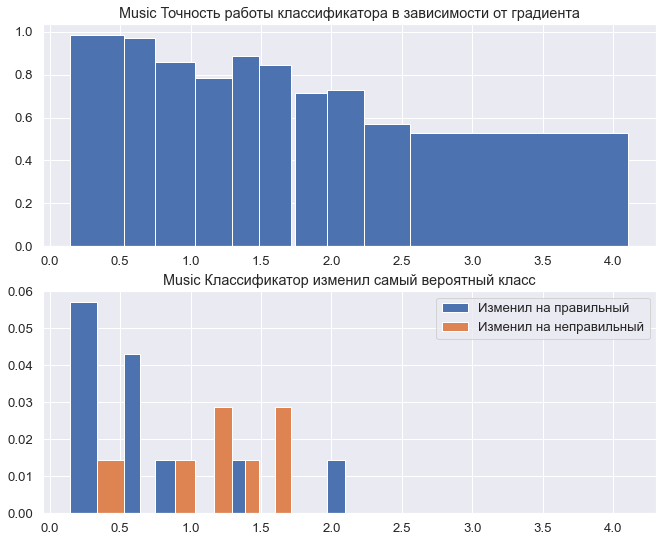

In [46]:
buckets, confidences, wrong, correct = bm.build_grad_hist(music_data, music_methods, music_points, 'Music', 70);
confidence_music = bm.get_confidence(buckets[0], confidences[0])

Iter 00, logit: -7.202692
Iter 10, logit: -6.147112
Iter 20, logit: -6.118829
Iter 30, logit: -6.104847
Iter 40, logit: -6.098567
Iter 50, logit: -6.095118
Iter 60, logit: -6.092918
Iter 70, logit: -6.091418
Iter 80, logit: -6.090356
Iter 90, logit: -6.089583
Iter 100, logit: -6.089009
Iter 110, logit: -6.088572
Iter 120, logit: -6.088232
Iter 130, logit: -6.087964
Iter 140, logit: -6.087748
Iter 150, logit: -6.087572
Iter 160, logit: -6.087427
Iter 170, logit: -6.087305
Iter 180, logit: -6.087203
Iter 190, logit: -6.087115
[0.09993472 0.10313253 0.11092602 0.0991359  0.0947824  0.11122991
 0.06140385 0.12126823 0.09149714 0.1066893 ]
---------------
Label accuracy is 0.7757142857142857
--------------------------------------------------
Data has 125 features
Iter 00, logit: -7.221320
Iter 10, logit: -5.956257
Iter 20, logit: -5.738515
Iter 30, logit: -5.563593
Iter 40, logit: -5.417342
Iter 50, logit: -5.289172
Iter 60, logit: -5.181250
Iter 70, logit: -5.088405
Iter 80, logit: -5.0084

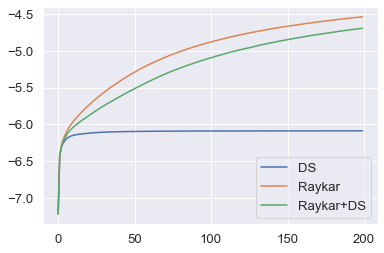

In [47]:
reload_all()
music_methods, music_points, advantages_matrix = bm.compare_methods(music_data, max_iter=200, lr=300, 
                                                                    confidence_estimator=confidence_music)

In [44]:
music_points[music_points.task.isin(advantages_matrix[0][1])]

,task,mu_ds,conf_mx_ds,mu_r,conf_mx_r,classifier_r,grad_r
507,pop.00024.mp3,"[0.298, 0.0, 0.014, 0.203, 0.066, 0.068, 0.0, ...","[-2.632, -52.363, -5.761, -3.01, -4.09, -4.22,...","[0.121, 0.0, 0.01, 0.545, 0.0, 0.0, 0.0, 0.324...","[-3.009, -170.373, -4.47, -2.711, -64.176, -14...","[0.106, 0.021, 0.037, 0.353, 0.035, 0.027, 0.0...","[0.74001, 0.53816, 0.56168, 0.56754, 0.54146, ..."
649,rock.00030.mp3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.377, 0.0, 0.0...","[-inf, -inf, -inf, -inf, -inf, -inf, -7.894, -...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.975, 0.0, 0.0...","[-inf, -inf, -inf, -inf, -inf, -inf, -7.022, -...","[0.096, 0.013, 0.096, 0.138, 0.185, 0.043, 0.1...","[1.85416, 1.71255, 2.16949, 2.43079, 2.54464, ..."


Annotation(annotator='A1G05O3HM7DNVZ', task='blues.00084.mp3', value='pop')
Annotation(annotator='AL12RG9EJZ60', task='blues.00084.mp3', value='country')
Annotation(annotator='AK0F484W5TBJ4', task='blues.00084.mp3', value='classical')


IndexError: index 58 is out of bounds for axis 1 with size 3

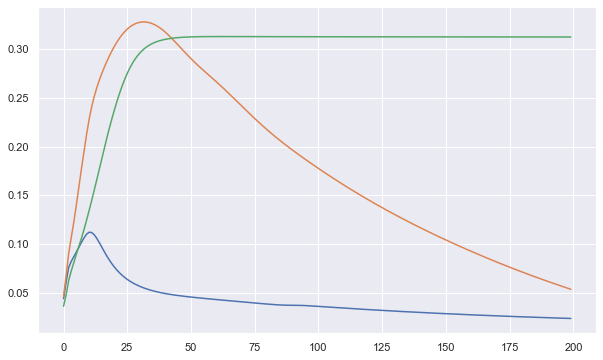

In [6]:
bm.plots_for_point(music_points, music_data, music_methods, 58)

In [28]:
reload_all()
bm.boosting_classifiers_distr(music_points[music_points.task.isin(advantages_matrix[1][0])],
                         music_points[music_points.task.isin(advantages_matrix[0][1])]) 

TypeError: boosting_classifiers_distr() missing 1 required positional argument: 'name'

In [14]:
music_points.classifier_rb.loc[507]

array([[0.543, 0.009, 0.013, 0.252, 0.034, 0.012, 0.016, 0.104, 0.007,
        0.009],
       [0.003, 0.   , 0.006, 0.932, 0.004, 0.036, 0.001, 0.001, 0.   ,
        0.017],
       [0.754, 0.006, 0.002, 0.003, 0.   , 0.007, 0.   , 0.002, 0.014,
        0.212]])

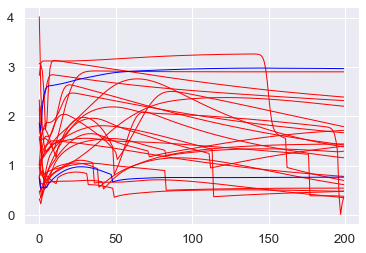

In [38]:
reload_all()
bm.plot_all_gradients(music_points[music_points.task.isin(advantages_matrix[1][0])],
                         music_points[music_points.task.isin(advantages_matrix[0][1])])